# W261 - Flight Delay Prediction

## Introduction and Exploratory Data Analysis

### Team 10:
  * YuLing Chen
  * Mitchel Li
  * Lesley Matheson
  * Ernesto Oropeza

Link to Data Pipeline and Model Notebook

This notebook is part 1 and 2 of the project. Sections 3-5 cover the Data Pipeline, Feature Engineering, Model Exploration, and the Conclusion. 

Link: https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/667068395493739/command/2834511320022845

### 1. Problem Statement

####1.1 Background
 
The expensive problem of airline flight delays has been studied for decades, as delays impact the $250B domestic airline industry to upwards of $8B annually, according to a 2010 study by the FAA. (cite). This financial incentive has catalyzed an enormous amount of research searching for models that can accurately predict an impending flight delay.  The domestic airline flight schedule is a highly complex, dynamic system.  The prediction of delays requires the consideration of a wide range of factors many of which interact with each other.  In this study, data on a five-year history of domestic airline flight behavior and concurrent weather data is used to produce several models that predict whether or not the actual departure time of a particular flight will experience a departure delay greater than 15 minutes from its scheduled departure time.

####1.2 Datasets

The first dataset included a table of flight information from the Bureau of Transportation which contains flights and 109 features associated with individual flights from the period of January 1, 2015 to December 31, 2019.  These airline features include temporal data such as the scheduled and actual flight times, scheduled and actual arrival times, day of the week, day of month, and quarter of the year.  The table also contains airplane characteristics such as the airlines ( carrier operator) and tail number of the aircraft.  Actual flight characteristics were provided that included distance, cancellations, reported delays and a classification of the type of delay.

The second dataset is a set of measurement from surface weather ground stations made publicly available from the National Oceanic Atmospheric Administration (NOAA) through the National Center for Environmental Information (NCEI).  This dataset, a subset of the Integrated Surface  Dataset (Global) (IS) spans the same timeframe as the flight dataset.  The presumption is that certain weather conditions can impact airlines ability to maintain flight schedules.  This dataset is considered for its ability to potentially improve accuracy of flight delay prediction.  The supposition is that certain characteristics of the local weather affect the ability of a carrier to maintain a flight schedule. This dataset contains a wide variety of weather conditions including measures such as wind speed and direction, horizontal visibility, dew point, and surface temperature.  The dataset contains XXX measurements provided by these ground weather stations.  The weather stations are located around the globe and reported measurements at varying times.  This dataset is very sparse and is constrained to ground level measurements.

The weather data used in this project has important limitations. The Integrated Surface Dataset does not provide a sharp focus on extreme weather conditions such as storms that can be found in other NOAA datasets (https://www.ncdc.noaa.gov/stormevents).  Such databases consolidate surface and measurements at elevations above the surface to report on the more extreme weather events, storms, hail, snow, high winds, that tend to impact flight delays substantially.  Measurements at elevation tend to be measured through radar-based detection facilities such as the network of NEXRAD avionic radars WSR88D (D for Doppler) built by Raytheon and installed throughout the United States at 159 stations.  These are still the gold standard for avionic weather measurements that convey weather characteristics at elevation that significantly affect airline flights and spacecraft launches.  Surface measurements are limited in their use for aviation.  Using these such radar-based datasets offers a potentially promising direction for further research.  

The IS dataset itself has limitations for this use beyond the type of measurements it contains.  The IS dataset is sparse and the timing of the station reported data varies from station to station.  These two characteristics require processing (discussed below) to interpolate data missing in timeframes surround flight times.  For example, a station may be reporting three times an hour for certain times during a day and these measurements are not evenly spaced throughout the hour.  Measurements for many times are not reported at all, requiring a decision on what measurements are potentially important for a particular flight.

The project also employed three additional datasets that facilitated the association of the IS dataset weather information with flight data.  The first additional dataset is a table of station locations, provided by UCAR, the University Corporation of Atmospheric Research. This dataset provided station identifiers (wban and usaf), longitude and latitude information.  The concatenation of these two station identifiers is present as a station identifier in the IS dataset.  The second additional dataset was a table of time zone identification for airport locations. The third dataset provided longitude and latitude information for airports.  The support of these additional tables enabled accurate interpolation of the surrounding surface weather and its accurate association to the flight on which the model is predicting a potential delay.

####1.3 Approach

The approach taken in this project was to use train machine learning models on the two primary datasets , the IS, limited weather dataset and the FAA dataset, to make a binary classification on any given flight represented to it in the format of the FAA dataset as likely to be delayed by fifteen minutes or more.

####1.4 Evaluation Metrics

Airline carriers schedule flights typically up to six months in advance through the computerized reservation system (CRS schedule) in time blocks adjusted to balance what is known as overage and underage costs, namely the cost of too many early or contemporaneous arrivals and the cost of too many delayed departures.  The schedule is optimized to balance these costs and factor in more qualitative factors such as impacts on customer satisfaction and loyalty.  In evaluating a model to predict departure delays it is a challenging question to ask which is more important from a profitability standpoint to an airline, underpredicting delays (false negative) or over predicting delays (false positives).  The costs of both are widely discussed in the literature and beyond the scope of this project.  For the project performance of the model is evaluated in terms of a metric that balances overpredicting delays with underpredicting delays.  The F1 score is the harmonic mean of precision and recall. 

Precision is defined as follows.
$$Precision = \frac{TP}{(TP + FP)}$$


In the context of the prediction of a flight delay this is the ratio correctly predicted flight delays (model predicts delay where there actually was a delay) to the sum of correctly flight delays and falsely predicted delays (model predicts a delay and the flight was not delayed). 

Recall is defined as follows.
$$Recall = \frac{TP}{(TP + FN)}$$


In the context of prediction of a flight delay this is the ratio of correctly predicted delays to the sum of correctly predicted delays and actual delays that were not predicted by the model.

F1 Score is the harmonic mean of precision and recall.  It balances the metrics of precision and recall in the formula as follows.
$$F1-Score = \frac{TP}{(TP + \frac{1}{2}(FN+TP))}$$

In the context of the airline industry balancing the costs of inaccuracy would tend to motivate using F1, a balanced metric.  From a market standpoint the costs of delays in terms of brand loyalty are hard to estimate but so that would tend to promote overpredicting to be conservative and prepare for a delay by making operational changes.  This would motivate precision as an efficient metric, even though the operational costs are high for preparing for a flight delay that does not happen.   So for this project the F1 score was employed, weighted by class weights. From purely economic standpoint the topic is still hotly debated, so a balanced metric was chosen with a slight prejudice for precision, both weighted by class.  Early in the project tree based models demonstrated the best promise, so these binary classification metrics were appropriate as opposed to other statistical metrics that could be more tailored to regression or Bayesian models.

###1.5 State of the Art

Research on time flight prediction has been studied for decades in different research domains.  Until the arrival of generalized machine learning models, such prediction models were the study of more industry specific efforts in transportation, and numerical methods domains such as applied mathematics and operations research.  Transportation focused research date back to the 1980s and queuing theory approaches appeared to have flourished in the 1990s.

Within the past 15 years, however, less domain specific approaches with machine learning models have surfaced with a fairly vast array of results.  The successful machine learning approaches appear to encompass a stable set of models that include Logistic Regression, and tree based approaches such as Decision Trees coupled with ensemble method.  Most recently deep learning approaches including Multilayer Perceptron and Convolutional Neural Networks have been investigated with promising results (JIANG 2020), accuracy at 89.32%.  Machine learning models in general have been trained on both airline and weather datasets in general. While the most popular focus of these research efforts in often arrival delays the results for the best models appears to be from 85% to 90% defined by different metrics all related to percent accuracy.  Efforts such as including Long Short Term Memory in Recurrent Neural Networks have also been a vigorous avenue for research.  The neural network approaches in some sense marry the more classical queuing systems delay propagation system approaches with current machine learning modeling techniques.

It is worth noting that most, if not all of the research observed only looks at operational airline data and surface weather data.  It seems that better features including perhaps avionic weather and perhaps maintenance schedules for example may be a promising path of study.

This project here focused on the development of Decision Tree models, and feature developed from two primary dataset discussed above.  Decision Tree models can handle a variety of different data types.  They are simple to understand, review performance and understand feature impacts.  Decision Trees here performed at least as well as other techniques such as Linear Regression which involve more data transformations and cleaning.  The ensemble method Random Forest was implemented to handle any potential inconsistencies in the test data.  The simplicity of the Decision Trees framework supported a focus more heavily on feature engineering which appeared to hold more promise than complicated model development and hyperparameter tuning.

In [0]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as f
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, NullType, ShortType, DateType, BooleanType, BinaryType
from pyspark.sql.types import FloatType
from pyspark.sql import SQLContext
from pyspark.sql.functions import when
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import col
from pyspark.sql import types
from pyspark.sql.functions import count

 

### 2. Exploratory Data Analysis

We conduct EDA in the following perspectives:

  1.  Dataset size and the impact on scalability 
  2.  Data cleaning including how to handle nulls and imbalance of the dataset
  3.  Data Exploration with focus on the impact on the flight departure delays
      * We will look into both the original data set as well as the feature engineered results to explore the correlation between features and the departure delay. The goal is to help with the feature selection and modeling phases.

md #### 2.1 Airline Flight Table

In [0]:
#Read in the table of historical flight data tracked by the FAA from January 2015 to December 2019
airlines = spark.read.option("header", "true").parquet(f"dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data/201*.parquet")
#Print the data scheme of the flight table
airlines.printSchema()
display(airlines.sample(False, 0.00001))

root
-- YEAR: integer (nullable = true)
-- QUARTER: integer (nullable = true)
-- MONTH: integer (nullable = true)
-- DAY_OF_MONTH: integer (nullable = true)
-- DAY_OF_WEEK: integer (nullable = true)
-- FL_DATE: string (nullable = true)
-- OP_UNIQUE_CARRIER: string (nullable = true)
-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
-- OP_CARRIER: string (nullable = true)
-- TAIL_NUM: string (nullable = true)
-- OP_CARRIER_FL_NUM: integer (nullable = true)
-- ORIGIN_AIRPORT_ID: integer (nullable = true)
-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
-- ORIGIN: string (nullable = true)
-- ORIGIN_CITY_NAME: string (nullable = true)
-- ORIGIN_STATE_ABR: string (nullable = true)
-- ORIGIN_STATE_FIPS: integer (nullable = true)
-- ORIGIN_STATE_NM: string (nullable = true)
-- ORIGIN_WAC: integer (nullable = true)
-- DEST_AIRPORT_ID: integer (nullable = true)
-- DEST_AIRPORT_SEQ_ID: integer (nullable = true)
-- DEST_CITY_MARKET_ID: integer (nullable = true)
-- DEST: string (nullable = true)
-- DEST_CITY_NAME: string (nullable = true)
-- DEST_STATE_ABR: string (nullable = true)
-- DEST_STATE_FIPS: integer (nullable = true)
-- DEST_STATE_NM: string (nullable = true)
-- DEST_WAC: integer (nullable = true)
-- CRS_DEP_TIME: integer (nullable = true)
-- DEP_TIME: integer (nullable = true)
-- DEP_DELAY: double (nullable = true)
-- DEP_DELAY_NEW: double (nullable = true)
-- DEP_DEL15: double (nullable = true)
-- DEP_DELAY_GROUP: integer (nullable = true)
-- DEP_TIME_BLK: string (nullable = true)
-- TAXI_OUT: double (nullable = true)
-- WHEELS_OFF: integer (nullable = true)
-- WHEELS_ON: integer (nullable = true)
-- TAXI_IN: double (nullable = true)
-- CRS_ARR_TIME: integer (nullable = true)
-- ARR_TIME: integer (nullable = true)
-- ARR_DELAY: double (nullable = true)
-- ARR_DELAY_NEW: double (nullable = true)
-- ARR_DEL15: double (nullable = true)
-- ARR_DELAY_GROUP: integer (nullable = true)
-- ARR_TIME_BLK: string (nullable = true)
-- CANCELLED: double (nullable = true)
-- CANCELLATION_CODE: string (nullable = true)
-- DIVERTED: double (nullable = true)
-- CRS_ELAPSED_TIME: double (nullable = true)
-- ACTUAL_ELAPSED_TIME: double (nullable = true)
-- AIR_TIME: double (nullable = true)
-- FLIGHTS: double (nullable = true)
-- DISTANCE: double (nullable = true)
-- DISTANCE_GROUP: integer (nullable = true)
-- CARRIER_DELAY: double (nullable = true)
-- WEATHER_DELAY: double (nullable = true)
-- NAS_DELAY: double (nullable = true)
-- SECURITY_DELAY: double (nullable = true)
-- LATE_AIRCRAFT_DELAY: double (nullable = true)
-- FIRST_DEP_TIME: integer (nullable = true)
-- TOTAL_ADD_GTIME: double (nullable = true)
-- LONGEST_ADD_GTIME: double (nullable = true)
-- DIV_AIRPORT_LANDINGS: integer (nullable = true)
-- DIV_REACHED_DEST: double (nullable = true)
-- DIV_ACTUAL_ELAPSED_TIME: double (nullable = true)
-- DIV_ARR_DELAY: double (nullable = true)
-- DIV_DISTANCE: double (nullable = true)
-- DIV1_AIRPORT: string (nullable = true)
-- DIV1_AIRPORT_ID: integer (nullable = true)
-- DIV1_AIRPORT_SEQ_ID: integer (nullable = true)
-- DIV1_WHEELS_ON: integer (nullable = true)
-- DIV1_TOTAL_GTIME: double (nullable = true)
-- DIV1_LONGEST_GTIME: double (nullable = true)
-- DIV1_WHEELS_OFF: integer (nullable = true)
-- DIV1_TAIL_NUM: string (nullable = true)
-- DIV2_AIRPORT: string (nullable = true)
-- DIV2_AIRPORT_ID: integer (nullable = true)
-- DIV2_AIRPORT_SEQ_ID: integer (nullable = true)
-- DIV2_WHEELS_ON: integer (nullable = true)
-- DIV2_TOTAL_GTIME: double (nullable = true)
-- DIV2_LONGEST_GTIME: double (nullable = true)
-- DIV2_WHEELS_OFF: integer (nullable = true)
-- DIV2_TAIL_NUM: string (nullable = true)
-- DIV3_AIRPORT: string (nullable = true)
-- DIV3_AIRPORT_ID: integer (nullable = true)
-- DIV3_AIRPORT_SEQ_ID: integer (nullable = true)
-- DIV3_WHEELS_ON: integer (nullable = true)
-- DIV3_TOTAL_GTIME: double (nullable = true)
-- DIV3_LONGEST_GTIME: double (nullable = true)
-- DIV3_WHEELS_

YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY DIV_DISTANCE DIV1_AIRPORT DIV1_AIRPORT_ID DIV1_AIRPORT_SEQ_ID DIV1_WHEELS_ON DIV1_TOTAL_GTIME DIV1_LONGEST_GTIME DIV1_WHEELS_OFF DIV1_TAIL_NUM DIV2_AIRPORT DIV2_AIRPORT_ID DIV2_AIRPORT_SEQ_ID DIV2_WHEELS_ON DIV2_TOTAL_GTIME DIV2_LONGEST_GTIME DIV2_WHEELS_OFF DIV2_TAIL_NUM DIV3_AIRPORT DIV3_AIRPORT_ID DIV3_AIRPORT_SEQ_ID DIV3_WHEELS_ON DIV3_TOTAL_GTIME DIV3_LONGEST_GTIME DIV3_WHEELS_OFF DIV3_TAIL_NUM DIV4_AIRPORT DIV4_AIRPORT_ID DIV4_AIRPORT_SEQ_ID DIV4_WHEELS_ON DIV4_TOTAL_GTIME DIV4_LONGEST_GTIME DIV4_WHEELS_OFF DIV4_TAIL_NUM DIV5_AIRPORT DIV5_AIRPORT_ID DIV5_AIRPORT_SEQ_ID DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME DIV5_WHEELS_OFF DIV5_TAIL_NUM 2019 2 6 22 6 2019-06-22 WN 19393 WN N792SW 2632 12391 1239103 31703 ISP Islip, NY NY 36 New York 22 10821 1082106 30852 BWI Baltimore, MD MD 24 Maryland 35 1700 1654 -6.0 0.0 0.0 -1 1700-1759 6.0 1700 1751 4.0 1815 1755 -20.0 0.0 0.0 -2 1800-1859 0.0 null 0.0 75.0 61.0 51.0 1.0 220.0 1 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2019 2 6 9 7 2019-06-09 UA 19977 UA N894UA 939 15370 1537002 34653 TUL Tulsa, OK OK 40 Oklahoma 73 11292 1129202 30325 DEN Denver, CO CO 8 Colorado 82 600 558 -2.0 0.0 0.0 -1 0600-0659 10.0 608 629 7.0 645 636 -9.0 0.0 0.0 -1 0600-0659 0.0 null 0.0 105.0 98.0 81.0 1.0 541.0 3 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2019 2 6 10 1 2019-06-10 OO 20304 OO N146SY 5527 15376 1537604 30436 TUS Tucson, AZ AZ 4 Arizona 81 14771 1477104 32457 SFO San Francisco, CA CA 6 California 91 1300 1313 13.0 13.0 0.0 0 1300-1359 13.0 1326 1518 7.0 1518 1525 7.0 7.0 0.0 0 1500-1559 0.0 null 0.0 138.0 132.0 112.0 1.0 751.0 4 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2016 3 7 6 3 2016-07-06 DL 19790 DL N912DL 1077 10397 1039705 30397 ATL Atlanta, GA GA 13 Georgia 34 14492 1449202 34492 RDU Raleigh/Durham, NC NC 37 North Carolina 36 1353 1803 250.0 250.0 1.0 12 1300-1359 13.0 1816 1915 4.0 1525 1919 234.0 234.0 1.0 12 1500-1559 0.0 null 0.0 92.0 76.0 59.0 1.0 356.0 2 0.0 13.0 0.0 0.0 221.0 null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2016 3 7 7 4 2016-07-07 UA 19977 UA N61886 1979 14683 1468303 33214 SAT San Antonio, TX TX 48 Texas 74 12266 1226603 31453 IAH Houston, TX TX 48 Texas 74 641 639 -2.0 0.0 0.0 -1 0600-0659 10.0 649 72

##### Airline Table Size and General Characteristics: 

The airline table contains the following size dimensions and characteristics.

* 317,468,41 flights 
* 109 flight characteristics (features)
* 371 airports
* 19 airlines

The sheer number of flights included the airline table alone strongly motivates the Spark framework for EDA, data ETL, model training and model testing. In addition, the size motivates the efficient use of the DBFS file system by writing partial results out to tables to avoid computation duplication. Finally, the table size motivates initial efforts that focus on only small subset of the data. Because the data has a temporal component, the use of a time based subset for initial exploration is motivated.  Here the assumption is that learning in the airline industry and FAA has occurred over time and the data in the table will reflect that learning. The very nature of flight data, namely a set of origins and destinations over time rules out the use of random subsets.  A random subset for example will most certainly lose valuable data about a daily flight path for a given airplane which may be valuable to a model. For this reason considering random subset was ruled out in favor of choosing time contiguous subsets of the airline flight table for exploration and development purposes.

In [0]:
#Print out the size of the airline table
print(f"Airline table has {airlines.count()} rows and {len(airlines.columns) } columns.")

#The number of airlines and airports in the table
airlines.select('ORIGIN').distinct().count()
#The number of airports and airlines 
print(f"The number of distinct airports is: {airlines.select('ORIGIN').distinct().count()}")
print(f"The number of distinct airlines is: {airlines.select('OP_UNIQUE_CARRIER').distinct().count()}")

#The min and max time of airline table
max_time_airline =airlines.select(f.max(f.col("FL_DATE")).alias("MAX")).limit(1).collect()[0].MAX
min_time_airline =airlines.select(f.min(f.col("FL_DATE")).alias("MIN")).limit(1).collect()[0].MIN

print(f"The first date in the airline table is: {min_time_airline}")
print(f"The last date in airlines table is: {max_time_airline}")

Airline table has 31746841 rows and 109 columns.
The number of distinct airports is: 371
The number of distinct airlines is: 19
The first date in the airline table is: 2015-01-01
The last date in airlines table is: 2019-12-31

####2.2 Weather Table

In [0]:
# Read in the table of weather readings
weather = spark.read.option("header", "true").parquet(f"dbfs:/mnt/mids-w261/datasets_final_project/weather_data/*.parquet")
weather.printSchema()
display(weather.sample(False, 0.00001))

root
-- STATION: string (nullable = true)
-- DATE: timestamp (nullable = true)
-- SOURCE: short (nullable = true)
-- LATITUDE: double (nullable = true)
-- LONGITUDE: double (nullable = true)
-- ELEVATION: double (nullable = true)
-- NAME: string (nullable = true)
-- REPORT_TYPE: string (nullable = true)
-- CALL_SIGN: string (nullable = true)
-- QUALITY_CONTROL: string (nullable = true)
-- WND: string (nullable = true)
-- CIG: string (nullable = true)
-- VIS: string (nullable = true)
-- TMP: string (nullable = true)
-- DEW: string (nullable = true)
-- SLP: string (nullable = true)
-- AW1: string (nullable = true)
-- GA1: string (nullable = true)
-- GA2: string (nullable = true)
-- GA3: string (nullable = true)
-- GA4: string (nullable = true)
-- GE1: string (nullable = true)
-- GF1: string (nullable = true)
-- KA1: string (nullable = true)
-- KA2: string (nullable = true)
-- MA1: string (nullable = true)
-- MD1: string (nullable = true)
-- MW1: string (nullable = true)
-- MW2: string (nullable = true)
-- OC1: string (nullable = true)
-- OD1: string (nullable = true)
-- OD2: string (nullable = true)
-- REM: string (nullable = true)
-- EQD: string (nullable = true)
-- AW2: string (nullable = true)
-- AX4: string (nullable = true)
-- GD1: string (nullable = true)
-- AW5: string (nullable = true)
-- GN1: string (nullable = true)
-- AJ1: string (nullable = true)
-- AW3: string (nullable = true)
-- MK1: string (nullable = true)
-- KA4: string (nullable = true)
-- GG3: string (nullable = true)
-- AN1: string (nullable = true)
-- RH1: string (nullable = true)
-- AU5: string (nullable = true)
-- HL1: string (nullable = true)
-- OB1: string (nullable = true)
-- AT8: string (nullable = true)
-- AW7: string (nullable = true)
-- AZ1: string (nullable = true)
-- CH1: string (nullable = true)
-- RH3: string (nullable = true)
-- GK1: string (nullable = true)
-- IB1: string (nullable = true)
-- AX1: string (nullable = true)
-- CT1: string (nullable = true)
-- AK1: string (nullable = true)
-- CN2: string (nullable = true)
-- OE1: string (nullable = true)
-- MW5: string (nullable = true)
-- AO1: string (nullable = true)
-- KA3: string (nullable = true)
-- AA3: string (nullable = true)
-- CR1: string (nullable = true)
-- CF2: string (nullable = true)
-- KB2: string (nullable = true)
-- GM1: string (nullable = true)
-- AT5: string (nullable = true)
-- AY2: string (nullable = true)
-- MW6: string (nullable = true)
-- MG1: string (nullable = true)
-- AH6: string (nullable = true)
-- AU2: string (nullable = true)
-- GD2: string (nullable = true)
-- AW4: string (nullable = true)
-- MF1: string (nullable = true)
-- AA1: string (nullable = true)
-- AH2: string (nullable = true)
-- AH3: string (nullable = true)
-- OE3: string (nullable = true)
-- AT6: string (nullable = true)
-- AL2: string (nullable = true)
-- AL3: string (nullable = true)
-- AX5: string (nullable = true)
-- IB2: string (nullable = true)
-- AI3: string (nullable = true)
-- CV3: string (nullable = true)
-- WA1: string (nullable = true)
-- GH1: string (nullable = true)
-- KF1: string (nullable = true)
-- CU2: string (nullable = true)
-- CT3: string (nullable = true)
-- SA1: string (nullable = true)
-- AU1: string (nullable = true)
-- KD2: string (nullable = true)
-- AI5: string (nullable = true)
-- GO1: string (nullable = true)
-- GD3: string (nullable = true)
-- CG3: string (nullable = true)
-- AI1: string (nullable = true)
-- AL1: string (nullable = true)
-- AW6: string (nullable = true)
-- MW4: string (nullable = true)
-- AX6: string (nullable = true)
-- CV1: string (nullable = true)
-- ME1: string (nullable = true)
-- KC2: string (nullable = true)
-- CN1: string (nullable = true)
-- UA1: string (nullable = true)
-- GD5: string (nullable = true)
-- UG2: string (nullable = true)
-- AT3: string (nullable = true)
-- AT4: string (nullable = true)
-- GJ1: string (nullable = true)
-- MV1: string (nullable = true)
-- GA5: string (nullable = true)
-- CT2: string (nullable = true)
-- CG2: string

STATION DATE SOURCE LATITUDE LONGITUDE ELEVATION NAME REPORT_TYPE CALL_SIGN QUALITY_CONTROL WND CIG VIS TMP DEW SLP AW1 GA1 GA2 GA3 GA4 GE1 GF1 KA1 KA2 MA1 MD1 MW1 MW2 OC1 OD1 OD2 REM EQD AW2 AX4 GD1 AW5 GN1 AJ1 AW3 MK1 KA4 GG3 AN1 RH1 AU5 HL1 OB1 AT8 AW7 AZ1 CH1 RH3 GK1 IB1 AX1 CT1 AK1 CN2 OE1 MW5 AO1 KA3 AA3 CR1 CF2 KB2 GM1 AT5 AY2 MW6 MG1 AH6 AU2 GD2 AW4 MF1 AA1 AH2 AH3 OE3 AT6 AL2 AL3 AX5 IB2 AI3 CV3 WA1 GH1 KF1 CU2 CT3 SA1 AU1 KD2 AI5 GO1 GD3 CG3 AI1 AL1 AW6 MW4 AX6 CV1 ME1 KC2 CN1 UA1 GD5 UG2 AT3 AT4 GJ1 MV1 GA5 CT2 CG2 ED1 AE1 CO1 KE1 KB1 AI4 MW3 KG2 AA2 AX2 AY1 RH2 OE2 CU3 MH1 AM1 AU4 GA6 KG1 AU3 AT7 KD1 GL1 IA1 GG2 OD3 UG1 CB1 AI6 CI1 CV2 AZ2 AD1 AH1 WD1 AA4 KC1 IA2 CF3 AI2 AT1 GD4 AX3 AH4 KB3 CU1 CN4 AT2 CG1 CF1 GG1 MV2 CW1 GG4 AB1 AH5 CN3 7650099999 2016-09-06T07:00:00.000+0000 4 43.435555 5.213611 22.55 PROVENCE, FR FM-15 99999 V020 340,1,V,0015,1 99999,9,9,N 009999,1,9,9 +0230,1 +0160,1 99999,9 02,1,+00366,1,99,9 9,AGL ,+99999,+99999 99,99,9,02,1,99,9,00366,1,99,9,99,9 10170,1,99999,9 MET070METAR LFML 060700Z AUTO 34003KT 310V060 9999 FEW012 23/16 Q1017 NOSIG= 7656099999 2016-01-20T10:00:00.000+0000 4 43.1833333 5.5833333 315.0 BEC DE LAIGLE, FR FM-12 99999 V020 280,1,N,0036,1 99999,9,9,N 999999,9,9,9 +9999,9 +9999,9 99999,9 3,99,0062,1,999 SYN06407656 26/// /2807 1//// 2//// 3//// 4//// 333 6///5 90710 91112= 01,9999,9,9 7667099999 2016-05-15T14:30:00.000+0000 4 43.097344 6.146028 2.13 LE PALYVESTRE, FR FM-15 99999 V020 230,1,N,0077,1 99999,9,9,Y 999999,9,9,9 +0240,1 +0060,1 99999,9 10100,1,99999,9 MET056METAR LFTH 151430Z AUTO 23015KT CAVOK 24/06 Q1010 NOSIG= 7667099999 2016-11-04T06:00:00.000+0000 4 43.097344 6.146028 2.13 LE PALYVESTRE, FR FM-12 99999 V020 320,1,N,0031,1 99999,9,9,N 013000,1,9,9 +0112,1 +0101,1 10187,1 240,M,+0133,1 240,N,+0104,1 99999,9,10182,1 1,1,002,1,+999,9 00,1 3,99,0088,1,999 SYN12807667 04963 /3206 10112 20101 30182 40187 51002 60002 700// 333 10133 20104 3/008 4//// 55/// 60007 70000 90710 91117 555 60005= 9999,1,9,999999,9,9 24,0000,9,1 03,0000,9,1 12,0000,9,1 70305800110 2016-08-17T21:56:00.000+0000 7 56.017 -161.167 4.3 NELSON LAGOON AIRPORT, AK US FM-15 PAOU V020 070,5,N,0057,5 22000,5,9,N 016093,5,N,5 +0172,5 +0117,5 10075,5 02,5,+03048,5,99,9 9,AGL ,+99999,+99999 02,99,5,99,9,99,9,03048,1,99,9,99,9 10075,5,10070,5 MET09308/17/16 12:56:01 METAR PAOU 172156Z 07011KT 10SM FEW100 17/12 A2975 RMK AO2 SLP075 T01720117 D01 0ADE726 1,99,1,+03048,5,9 70306125521 2016-02-08T04:06:00.000+0000 7 59.32417 -155.90167 27.4 IGIUGIG AIRPORT, AK US FM-15 PAIG V020 010,5,N,0046,5 22000,5,9,N 016093,5,N,5 +0006,5 -0028,5 10006,5 00,5,+99999,9,99,9 00,99,1,99,9,99,9,99999,9,99,9,99,9 09997,5,09965,5 MET10002/07/16 19:06:02 METAR PAIG 080406Z 01009KT 10SM CLR 01/M03 A2952 RMK AO2 SLP006 T00061028 FZRANO $ 0,99,1,+99999,9,9 70308025713 2016-12-02T22:53:00.000+0000 7 57.15528 -170.22222 10.7 ST PAUL ISLAND AIRPORT, AK US FM-15 PASN V030 270,5,N,0015,5 22000,5,9,N 016093,5,N,5 -0006,5 -0028,5 10149,5 04,5,+00701,5,99,9 04,5,+00853,5,99,9 9,AGL ,+99999,+99999 04,99,5,99,9,99,9,00701,1,99,9,99,9 10149,5,10138,5 MET10812/02/16 13:53:02 METAR PASN 022253Z 27003KT 10SM SCT023 SCT028 M01/M03 A2997 RMK AO2 SLP149 T10061028 (HCH) D01 0ADE726 2,99,1,+00701,5,9 2,99,1,+00853,5,9 01,0000,9,5 99999994085 2016-04-04T14:10:00.000+0000 null 44.0194 -100.353 647.4 PIERRE 24 S, SD US CRN05 99999 V020 999,9,9,9999,9 99999,9,9,N 999999,9,9,9 +0011,1 +9999,9 99999,9 05,+0010,1,0,0736,1,0 +0011,1,0 05,0000,9,1 +0011,1,0 +03538,1,0 +0011,1,0 +03572,1,0 99,-06 05,+00000,1,0 +03616,1,0 11860,1,0,29780,1,0 99999994088 2016-01-31T06:45:00.000+0000 null 44.5169 -104.4363 1765.4 SUNDANCE 8 NNW, WY US CRN05 99999 V020 999,9,9,9999,9 99999,9,9,N 999999,9,9,9 -0057,1 +9999,9 99999,9 05,-0058,1,0,0687,1,0 -0057,1,0 05,0000,9,1 -0057,1,0 +04509,1,0 -0057,1,0 +04552,1,0 99,-07 05,+00000,1,0 +04492,1,0 11290,1,0,29520,1,0 99999994644 2016-02-16T00:35:00.000+0000 null 44.9281 -68.7006 38.7 OLD TOWN 2 W, ME US CRN05 99999 V020 999,9,9,9999

##### Weather Table Size and General Characteristics: 

The weather table contains the following characteristics and dimensions.

* 630,904,436 weather station readings 
* 177 columns of weather features 

The weather table compiles readings from ground weather stations.  The frequency of the readings varies from station to station.  The first ten columns of the table are metadata about the weather readings. The weather table contains a station identifier which identifies the ground station taking the weather measurements.  If the station id contains 999999 it contains erroneous data that needs to be thrown out in the data cleaning stage.  The table contains a "DATE" or UTC timestamp of the local time at which the reading was taken. The "SOURCE" column identifies a particular meter at a station.  The "call sign" maps a station to potentially an three letter airport identifier.   The weather table contains latitiude and longitude data. In this weather data the indicator 999999 implies bad data and such data should be replaced with null entries to support the model.  The remaining 167 columns contain a sparsely populated set of weather readings including the following presumably important features.

* WND: wind, including speed, max gusts and direction 
* CIG: ceiling, the height of the lowest layer of clouds, when the sky is broken or overcast
* VIS: visibility including distance and horizontal
* DEW: dew point
* SLP: sea level pressure

The precipitation data in the table is located in AW1 and was not used in this model.  The premise is that surface rain is not a strong influence in the prediction of delays.  Storms, often indicated by a combination of wind characteristics and precipitation, do presumably affect takeoff and landings, however combining these characteristics to obtain storm features is beyond the scope of this project. The incorporating  of storm data in a model would be a potentially promising further area of study.

In [0]:
# Calculating the size of the weather table
print(f"Weather table has {weather.count()} rows and {len(weather.columns) } columns.")
#Print out the date range of the weather table
max_time_weather =weather.select(f.max(f.col("DATE")).alias("MAX")).limit(1).collect()[0].MAX
min_time_weather =weather.select(f.min(f.col("DATE")).alias("MIN")).limit(1).collect()[0].MIN
print(f"The earliest date and time in weather table is: {min_time_weather}")
print(f"The lastest date and time in weather table is: {max_time_weather}") 
print(f"Number of distinct stations in weather table is: {weather.select('STATION').distinct().count()}")

Weather table has 630904436 rows and 177 columns.
The earliest date and time in weather table is: 2015-01-01 00:00:00
The lastest date and time in weather table is: 2019-12-31 23:59:00
Number of distinct stations in weather table is: 15195

####2.3 Station Table

In [0]:
# Read in the Station table  
stations = spark.read.option("header", "true").csv("dbfs:/mnt/mids-w261/DEMO8/gsod/stations.csv.gz")
stations.printSchema()
display(stations)

root
-- usaf: string (nullable = true)
-- wban: string (nullable = true)
-- name: string (nullable = true)
-- country: string (nullable = true)
-- state: string (nullable = true)
-- call: string (nullable = true)
-- lat: string (nullable = true)
-- lon: string (nullable = true)
-- elev: string (nullable = true)
-- begin: string (nullable = true)
-- end: string (nullable = true)

usaf wban name country state call lat lon elev begin end 007018 99999 WXPOD 7018 null null null 0 0 +7018.0 20110309 20130730 007026 99999 WXPOD 7026 AF null null 0 0 +7026.0 20120713 20170822 007070 99999 WXPOD 7070 AF null null 0 0 +7070.0 20140923 20150926 008268 99999 WXPOD8278 AF null null 32.95 65.567 +1156.7 20100519 20120323 008307 99999 WXPOD 8318 AF null null 0 0 +8318.0 20100421 20100421 010016 99999 RORVIK/RYUM NO null null 64.85 11.233 +0014.0 19870116 19910806 010017 99999 FRIGG NO null ENFR 59.98 2.25 +0048.0 19880320 20050228 010071 99999 LONGYEARBYEN SV null null 78.217 15.583 +0037.0 20050210 20050210 010190 99999 SVARTTANGEN NO null null 77.517 20.817 +0020.0 20100825 20140523 010303 99999 TROMSO/SKATTURA NO null null 69.7 19.017 +0014.0 20140522 20150108 010320 99999 OVERBYGD NO null null 69.017 19.283 +0078.0 19730101 20140523 010340 99999 FUGLOYKALVEN FYR NO null null 70.317 20.15 +0038.0 19871202 20140523 010510 99999 SUOLOVUOPMI NO null null 69.583 23.533 +0374.0 19730102 20140523 010530 99999 HAMMERFEST RADIO NO null null 70.683 23.683 +0070.0 19730101 19871226 010610 99999 BRENNELV NO null null 70.067 25.117 +0034.0 19730101 19840707 010660 99999 HELNES FYR NO null null 71.067 26.233 +0033.0 19730101 20040619 010670 99999 LEVAJOK-EVJEN NO null null 69.9 26.417 +0112.0 19730103 19820924 010671 99999 LEVAJOK-EVJEN NO null null 69.9 26.417 +0112.0 20070307 20070307 010750 99999 RUSTEFJELBMA NO null null 70.4 28.2 +0011.2 19730101 20130531 010884 99999 GEITERYGGEN NO null ENSN 59.185 9.567 +0141.1 19960101 20151109 011020 99999 SKLINNA FYR NO null null 65.2 11 +0016.0 19750228 20190228 011030 99999 LEKA NO null null 65.1 11.7 +0047.0 19730101 20070307 011051 99999 SKOMVAER (LGT-H) NO null null 67.417 11.883 +0018.0 20070307 20070307 011100 99999 YTTERHOLMEN FYR NO null null 66 11.683 +0033.0 19961201 20050319 011130 99999 GLOMFJORD NO null null 66.8 13.983 +0039.0 20040406 20091216 011133 99999 DAGALI NO null ENDI 60.417 8.513 +0798.0 19860509 20030427 011310 99999 GLAPEN LIGHTHOUSE NO null null 67.883 13.05 +0031.0 19730101 19850625 011340 99999 MAJAVATN III NO null null 65.183 13.417 +0339.0 19730101 20070630 011380 99999 TENNHOLMEN (LGT-H) NO null null 67.3 13.5 +0014.0 19850912 20070307 011430 99999 DRAG-AJLUOKTA NO null null 68.05 16.083 +0019.0 20070806 20180917 011490 99999 RANA-BASMOEN NO null null 66.333 14.1 +0042.0 19730101 20070228 011501 99999 HATTFJELLDAL-KRUTA NO null null 65.683 14.167 +0385.0 20020312 20020312 011530 99999 BODO-VAGONES NO null null 67.283 14.45 +0033.0 20111003 20140611 011540 99999 LITLOY FYR NO null null 68.583 14.3 +0030.0 19940406 20170801 011630 99999 BOLNA NO null null 66.5 15.25 +0549.0 19730101 19770823 011680 99999 KLEIVA I SORTLAND NO null null 68.65 15.283 +0023.0 19730101 20060611 011691 99999 OVRE SALTDAL NO null null 66.967 15.317 +0026.0 19730101 19781008 011700 99999 FAUSKE-VETEN NO null null 67.233 15.317 +0165.0 19730101 19900307 011720 99999 FINNOY I HAMAROY NO null null 68 15.617 +0053.0 19730101 20060311 011760 99999 KONGSVIK NO null null 68.567 16.267 +0025.0 19730101 19780118 011840 99999 SANDSOY I SENJA NO null null 68.933 16.683 +0045.0 19730101 19780613 011841 99999 SANDSOY NO null null 68.933 16.683 +0045.0 20070307 20070307 011890 99999 LILAND NO null null 68.483 16.883 +0019.0 19730102 20050302 011930 99999 NARVIK III/FRAMNES NO null ENNK 68.467 17.5 +0023.0 19960101 20170403 011960 99999 TENNEVOLL NO null null 68.75 17.817 +0021.0 19730101 20020808 012070 99999 FISKABYGD NO null null 62.1 5.583 +0041.0 20040510 20180630 012091 99999 ORSTA-VOLDA/HOVD NO null ENOV 62.183 6.05 +0074.0 19840910 19841127 012150 99999 HJELVIK MYRBO NO null null 62.62 7.23 +0035.0 19730101 20090630 012160 99999 HJELVIK I ROMSDAL NO null null 62.617 7.217 +0016.0 19731226 20020527 012161 99999 GJERMUNDNES NO null null 62.617 7.167 +0049.0 20040412 20040412 012241 99999 SKALMEN FYR NO null null 63.467 7.75 +0013.0 19960101 19961231 012273 99999 TINGVOLL-HANEM NO null 

##### Station Table Size and General Characteristics
The Stations Table contains 11 features that describe the stations from which the surface weather data was gathered.  The concatenation of the "usaf" and "wban" columns create the "station id" that is located in the Weather Table.  This could be used to join the Airline Flight Table with the Weather Table in a three way join.  Alternatively, the longitude and latitude data can be used to choose a set of stations surrounding the airport to collecting develop an interpolated or averaged weather reading around the airport.  This latter approach requires the use of location data, in longitude and latitude from another table.  The latter approach was used in this project and explained in more detail below. 

* 29,771 rows and 11 columns  
* Number of distinct stations in weather table: 15,195 
* Number of distinct stations in station table: 25,744

In [0]:
# Gather basic information about the Stations table
print(f"Stations table has {stations.count()} rows and {len(stations.columns) } columns.")
#The number of stations in weather table
print(f"Number of distinct stations in weather table:{weather.select('STATION').distinct().count()}")
print(f"Number of distinct stations in station table:{stations.select('lat', 'lon').distinct().count()}")


Stations table has 29771 rows and 11 columns.
Number of distinct stations in weather table:15195
Number of distinct stations in station table:25744

#### 2.4 Data Cleaning, Feature Reduction and Class Imbalance

##### 2.4.1 Handling Null Values in the Airline Flight Table and the Weather Table
 
There are <a href="https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/">various ways</a>  to handle null values. Many models can handle null values directly without requiring preprocessing of the dataset. For example, DecisionTreeClassifier and other tree-based models in Spark's MLlib uses hyper-parameter<a href="https://spark.apache.org/docs/latest/api/R/spark.gbt.html"> handleInvalid </a> to deal with null values in the model. When choosing 'keep' for this hyper-parameter, the model can put invalid data in a special additional bucket. In the same set of libraries, RandomForest, the ensemble method, can handle null values similarly for a tree based baseline method such ss decision trees.

Given that the model choice was ultimately tree-based, the response to the presense of null values varied depending on where they were located. The presence of nulls in critical features of the Airline Flight Table, such as departure time, arrival time, CRS departure time (scheduled) and CRS arrival time caused the flight to be dropped from the table. For additional features, the presence of nulls is treated on a case by case basis. The quantity of nulls informed feature selection in this project.  Namely, if a feature in the weather table contained an overwhelming  number of nulls it was dropped. In an effort with a longer timeline (this project was completed in six weeks under-reources constraints) such features would not be dropped ariori. The existence of a lot of null values does not necessarily mean the feature is not important and should not be considered. The presence of nulls in the Weather Table is assessed after the table is transformed to incorporate time bins of fifteen minute increments and weather is interpolated from neighboring weather stations.

In [0]:
# Function returns the percentage of nulls in a table column and returns columns such that all rows contain nulls
def get_null_columns(table, tablename):
    nullColumns = []
    numRows = table.count()
    print(f"====Printing the columns with null value numbers for \'{tablename}\' table====")
    total_rows = table.count()
    for k in table.columns:
        nullRows = table.where(col(k).isNull()).count()
        if(nullRows>0):
            print(f"{k}: {nullRows} null rows, {round(nullRows*100/total_rows,2)}% percent")
        if nullRows ==  numRows: # i.e. if ALL values are NULL
            nullColumns.append(k)
            
    return nullColumns

In [0]:
#print null column data for all the three tables
get_null_columns(airlines, "airlines")
get_null_columns(stations, "stations")
get_null_columns(weather, "weather")

====Printing the columns with null value numbers for 'airlines' table====
TAIL_NUM: 72487 null rows, 0.23% percent
DEP_TIME: 472320 null rows, 1.49% percent
DEP_DELAY: 477296 null rows, 1.5% percent
DEP_DELAY_NEW: 477296 null rows, 1.5% percent
DEP_DEL15: 477296 null rows, 1.5% percent
DEP_DELAY_GROUP: 477296 null rows, 1.5% percent
TAXI_OUT: 486417 null rows, 1.53% percent
WHEELS_OFF: 486412 null rows, 1.53% percent
WHEELS_ON: 501924 null rows, 1.58% percent
TAXI_IN: 501924 null rows, 1.58% percent
ARR_TIME: 501922 null rows, 1.58% percent
ARR_DELAY: 570640 null rows, 1.8% percent
ARR_DELAY_NEW: 570640 null rows, 1.8% percent
ARR_DEL15: 570640 null rows, 1.8% percent
ARR_DELAY_GROUP: 570640 null rows, 1.8% percent
CANCELLATION_CODE: 31256894 null rows, 98.46% percent
CRS_ELAPSED_TIME: 164 null rows, 0.0% percent
ACTUAL_ELAPSED_TIME: 568042 null rows, 1.79% percent
AIR_TIME: 568042 null rows, 1.79% percent
CARRIER_DELAY: 25947727 null rows, 81.73% percent
WEATHER_DELAY: 25947727 null rows, 81.73% percent
NAS_DELAY: 25947727 null rows, 81.73% percent
SECURITY_DELAY: 25947727 null rows, 81.73% percent
LATE_AIRCRAFT_DELAY: 25947727 null rows, 81.73% percent
FIRST_DEP_TIME: 31543579 null rows, 99.36% percent
TOTAL_ADD_GTIME: 31543581 null rows, 99.36% percent
LONGEST_ADD_GTIME: 31543581 null rows, 99.36% percent
DIV_AIRPORT_LANDINGS: 3 null rows, 0.0% percent
DIV_REACHED_DEST: 31668733 null rows, 99.75% percent
DIV_ACTUAL_ELAPSED_TIME: 31680723 null rows, 99.79% percent
DIV_ARR_DELAY: 31680722 null rows, 99.79% percent
DIV_DISTANCE: 31668745 null rows, 99.75% percent
DIV1_AIRPORT: 31665200 null rows, 99.74% percent
DIV1_AIRPORT_ID: 31665200 null rows, 99.74% percent
DIV1_AIRPORT_SEQ_ID: 31665200 null rows, 99.74% percent
DIV1_WHEELS_ON: 31665201 null rows, 99.74% percent
DIV1_TOTAL_GTIME: 31665200 null rows, 99.74% percent
DIV1_LONGEST_GTIME: 31665200 null rows, 99.74% percent
DIV1_WHEELS_OFF: 31680304 null rows, 99.79% percent
DIV1_TAIL_NUM: 31680302 null rows, 99.79% percent
DIV2_AIRPORT: 31746154 null rows, 100.0% percent
DIV2_AIRPORT_ID: 31746150 null rows, 100.0% percent
DIV2_AIRPORT_SEQ_ID: 31746150 null rows, 100.0% percent
DIV2_WHEELS_ON: 31746154 null rows, 100.0% percent
DIV2_TOTAL_GTIME: 31746154 null rows, 100.0% percent
DIV2_LONGEST_GTIME: 31746154 null rows, 100.0% percent
DIV2_WHEELS_OFF: 31746564 null rows, 100.0% percent
DIV2_TAIL_NUM: 31746564 null rows, 100.0% percent
DIV3_AIRPORT: 31746834 null rows, 100.0% percent
DIV3_AIRPORT_ID: 31746834 null rows, 100.0% percent
DIV3_AIRPORT_SEQ_ID: 31746834 null rows, 100.0% percent
DIV3_WHEELS_ON: 31746834 null rows, 100.0% percent
DIV3_TOTAL_GTIME: 31746834 null rows, 100.0% percent
DIV3_LONGEST_GTIME: 31746834 null rows, 100.0% percent
DIV3_WHEELS_OFF: 31746840 null rows, 100.0% percent
DIV3_TAIL_NUM: 31746840 null rows, 100.0% percent
DIV4_AIRPORT: 31746841 null rows, 100.0% percent
DIV4_AIRPORT_ID: 31746841 null rows, 100.0% percent
DIV4_AIRPORT_SEQ_ID: 31746841 null rows, 100.0% percent
DIV4_WHEELS_ON: 31746841 null rows, 100.0% percent
DIV4_TOTAL_GTIME: 31746841 null rows, 100.0% percent
DIV4_LONGEST_GTIME: 31746841 null rows, 100.0% percent
DIV4_WHEELS_OFF: 31746841 null rows, 100.0% percent
DIV4_TAIL_NUM: 31746841 null rows, 100.0% percent
DIV5_AIRPORT: 31746841 null rows, 100.0% percent
DIV5_AIRPORT_ID: 31746841 null rows, 100.0% percent
DIV5_AIRPORT_SEQ_ID: 31746841 null rows, 100.0% percent
DIV5_WHEELS_ON: 31746841 null rows, 100.0% percent
DIV5_TOTAL_GTIME: 31746841 null rows, 100.0% percent
DIV5_LONGEST_GTIME: 31746841 null rows, 100.0% percent
DIV5_WHEELS_OFF: 31746841 null rows, 100.0% percent
DIV5_TAIL_NUM: 31746841 null rows, 100.0% percent
====Printing the columns with null value numbers for 'stations' table====
name: 789 null rows, 2.65% percent
country: 938 null rows, 3.15% percent
state: 23029 null rows, 77.35% percent
call: 18884 null rows, 63.43% percent
lat: 1204 null rows, 4.04% percent
lon: 1205 null rows, 4.05% percent
elev: 1298 null rows, 4.36

##### 2.4.2 Airline Flight Table Dimension Reduction 

The analysis above shows that the features detailing diversion information about flights is between 99% and 100% null values.  For this reasons coupled with the reasoning that diversion information would most likely not have a measureable impact on flight delays, the model drops all diversion related features.  The explanation for the delay column, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY and LATE_AIRCRAFT_DELAY are also dropped as they are not features that can be used to predict a for a flight presented for classification.  Further, if a flight is canceled this model does not consider it as a feature, nor having predictive value so cancelation related features are not used. These features include: CANCELLED and CANCELLATION_CODE. Similarly, taxi information was not deemed relevant or within the scope of this analysis to WHEELS_OFF, WHEELS_ON, TAXI_IN, TAXI_OUT were dropped despite the fact that they did not contain a large quantity of null values. The origin city identification is replicated multiple times in the Airline Flight Table so several features are deleted based on this basis. These columns include:ORIGIN_AIRPORT_SEQ_ID, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, ORIGIN_STATE_FIPS, ORIGIN_STATE_NM,and ORIGIN_WAC.

In [0]:
df_select = airlines

In [0]:
#Drop unused columns countaining diversion information and other very sparse data not considered by our model
df_select = df_select.drop("ORIGIN_AIRPORT_SEQ_ID","ORIGIN_CITY_NAME","ORIGIN_STATE_ABR","ORIGIN_STATE_FIPS","ORIGIN_STATE_NM","ORIGIN_WAC", "TAXI_OUT","WHEELS_OFF","WHEELS_ON","TAXI_IN","ARR_DELAY_GROUP","CANCELLED","CANCELLATION_CODE","DIVERTED","CRS_ELAPSED_TIME","ACTUAL_ELAPSED_TIME","AIR_TIME","FLIGHTS","DISTANCE","DISTANCE_GROUP","CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY","FIRST_DEP_TIME","TOTAL_ADD_GTIME","LONGEST_ADD_GTIME","DIV_AIRPORT_LANDINGS","DIV_REACHED_DEST","DIV_ACTUAL_ELAPSED_TIME","DIV_ARR_DELAY","DIV_DISTANCE","DIV1_AIRPORT","DIV1_AIRPORT_ID","DIV1_AIRPORT_SEQ_ID","DIV1_WHEELS_ON","DIV1_TOTAL_GTIME","DIV1_LONGEST_GTIME","DIV1_WHEELS_OFF","DIV1_TAIL_NUM","DIV2_AIRPORT","DIV2_AIRPORT_ID","DIV2_AIRPORT_SEQ_ID","DIV2_WHEELS_ON","DIV2_TOTAL_GTIME","DIV2_LONGEST_GTIME","DIV2_WHEELS_OFF","DIV2_TAIL_NUM","DIV3_AIRPORT","DIV3_AIRPORT_ID","DIV3_AIRPORT_SEQ_ID","DIV3_WHEELS_ON","DIV3_TOTAL_GTIME","DIV3_LONGEST_GTIME","DIV3_WHEELS_OFF","DIV3_TAIL_NUM","DIV4_AIRPORT","DIV4_AIRPORT_ID","DIV4_AIRPORT_SEQ_ID","DIV4_WHEELS_ON","DIV4_TOTAL_GTIME","DIV4_LONGEST_GTIME","DIV4_WHEELS_OFF","DIV4_TAIL_NUM","DIV5_AIRPORT","DIV5_AIRPORT_ID","DIV5_AIRPORT_SEQ_ID","DIV5_WHEELS_ON","DIV5_TOTAL_GTIME","DIV5_LONGEST_GTIME","DIV5_WHEELS_OFF","DIV5_TAIL_NUM","OP_CARRIER_AIRLINE_ID", "ORIGIN_CITY_MARKET_ID", "DEST_AIRPORT_SEQ_ID", "DEST_CITY_MARKET_ID","DEST_CITY_NAME", "DEST_STATE_ABR", "DEST_STATE_NM", "DEST_WAC","YEAR", "DEP_DELAY_GROUP","DEST_STATE_FIPS")

##### 2.4.3 Dataset Class Imbalance 

In this project the problem of a binary classification is considered.  Is a flight with 109 features presented likely to be delayed by more than 15 minutes or not?  The Airline Flight Table contains a five year history of flights and their history of delayed by 15 minutes or not for a supervised learning technique on a training set. In the history presented the percentage of delayed flights is significantly smaller than the percentage of flights that are not delayed by more than 15 minutes. Imbalanced classes in training data pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. The magnitude of the imbalance is presented below.

In [0]:
#Generate the percentage of flights being delayed by more than 15 minutes in the five years of data in the Airline Flight Table
total_flights_delayed=airlines.select( 'DEP_DEL15').filter(f.col('DEP_DEL15')=='1').count()
total_flights_not_delayed=airlines.select( 'DEP_DEL15').filter(f.col('DEP_DEL15')=='0').count()
print(f"The total number of flights delayed by more than 15 minutes: {total_flights_delayed}.")
print(f"The total number of flights delayed by more than 15 minuntes: {total_flights_not_delayed}.")
print(f"The percentage of flights being delayed by more than 15 minutes is {round(100*total_flights_delayed/(total_flights_delayed+total_flights_not_delayed), 2)}%.")

The total number of flights delayed by more than 15 minutes: 5693541.
The total number of flights delayed by more than 15 minuntes: 25576004.
The percentage of flights being delayed by more than 15 minutes is 18.21%.

This exploration shows that the delayed class, referred to as Class 1 in the Airlines Flights Table is approximately 18.21%, which suggests  a fairly significant imbalance for most machine learning models.  Typically machine learning models working on an imbalance of this size tend to train in a bias for the majority class. If a highly imbalanced set is passed into a decision tree to predict on, it could lead to higher purity of the majority class (which is very good); however, is it as the expense of the minority class. This results in a strong prediction bias towards the majority class. To correct for this imbalance several approaches were undertaken. These approaches included undersampling of the majority class, oversampling of the minority class, methods that synthetically construct new data for the minority class by using a variety of algorithms and class reweighting.  In this project, after considering the four different techniques, in concert and standalone ultimately a combination of undersampling and oversampling were employed. Ultimately, experimentation and models results drove this choice (and access to computing resources). Oversampling and undersampling allowed for more granular control compared to class weights on handling the imbalance to see what an optimal distribution ratio would be. Results with class weights and SMOTE were slightly inferior to an optimized combination of random oversampling and random undersampling.  The optimal parameters found in this study suggested that oversampling 30% and undersampling 80% produced the best results for decision trees based models on the chosen feature set.

#### 2.5 Exploring Temporal Impacts on Departure Delay

This section considers the potential relationships between time and date on flight departure delays. This section considers recurrent and repeatable features such as the hour of the day, the day of the week, the month of the year and the quarter of the year.  
An exploration of the temporal features suggests they are important.  Results included the following.

* **Day Of Week**: Monday, Thursday, Friday, and Sunday have more departure delays than other days of the week.  
* **Month of Week**: June, July, August, and December have more departure delays than other months of the year.
* **Hour of Day**: Early days of each month have more departure delays than other months of the year. 

These results suggest that including features with a temporal component in a machine learning model could impute valuable signal to the prediction.

In [0]:
#Computing the mean departure delay for each day of the week 
dep_delay_mean=airlines.select( 'DAY_OF_WEEK','DEP_DELAY' ).groupBy('DAY_OF_WEEK').agg(f.avg('DEP_DELAY')).withColumnRenamed('avg(DEP_DELAY)', 'MEAN_DEP_DEL_TIME') 
arr_delay_mean=airlines.select( 'DAY_OF_WEEK','ARR_DELAY' ).groupBy('DAY_OF_WEEK').agg(f.avg('ARR_DELAY')).withColumnRenamed('avg(ARR_DELAY)', 'MEAN_ARR_DEL_TIME') 
dayOfWeek_delay = dep_delay_mean.join(arr_delay_mean, ['DAY_OF_WEEK'])   
df = dayOfWeek_delay.toPandas()
data_day = df.sort_values(by='DAY_OF_WEEK', ascending=True)

##Computing the mean departure delay for each month of the year
dep_delay_mean=airlines.select( 'MONTH','DEP_DELAY' ).groupBy('MONTH').agg(f.avg('DEP_DELAY')).withColumnRenamed('avg(DEP_DELAY)', 'MEAN_DEP_DEL_TIME') 
arr_delay_mean=airlines.select( 'MONTH','ARR_DELAY' ).groupBy('MONTH').agg(f.avg('ARR_DELAY')).withColumnRenamed('avg(ARR_DELAY)', 'MEAN_ARR_DEL_TIME') 
month_delay = dep_delay_mean.join(arr_delay_mean,['MONTH'])
df = month_delay.toPandas()
data_month = df.sort_values(by='MONTH', ascending=True)

##Computing the mean departure delay for each month of the year
data=airlines
data = data.withColumn("HOUR_OF_DAY", when(f.col("DEP_TIME") > 999, data.DEP_TIME.substr(1, 2)).when(f.col("DEP_TIME") > 99, data.DEP_TIME.substr(1,1)).otherwise(0))
dep_delay_mean=data.select( 'HOUR_OF_DAY','DEP_DELAY' ).groupBy('HOUR_OF_DAY').agg(f.avg('DEP_DELAY')).withColumnRenamed('avg(DEP_DELAY)', 'MEAN_DEP_DEL_TIME') 
df = dep_delay_mean.toPandas()
df['HOUR_OF_DAY'] = df['HOUR_OF_DAY'].astype(int)
data_hour = df.sort_values(by='HOUR_OF_DAY', ascending=True)

##Computing the mean departure delay for each quarter of the year
data=airlines
dep_delay_mean=data.select( 'QUARTER','DEP_DELAY' ).groupBy('QUARTER').agg(f.avg('DEP_DELAY')).withColumnRenamed('avg(DEP_DELAY)', 'MEAN_DEP_DEL_TIME') 
df = dep_delay_mean.toPandas()
data_quarter = df.sort_values(by='QUARTER', ascending=True)

##Computing the mean departure delay for each day of the month
data = airlines
dep_delay_mean=data.select( 'DAY_OF_MONTH','DEP_DELAY')\
.groupBy('DAY_OF_MONTH').agg(f.avg('DEP_DELAY')).withColumnRenamed('avg(DEP_DELAY)', 'MEAN_DEP_DEL_TIME') 
arr_delay_mean=airlines.select( 'DAY_OF_MONTH','ARR_DELAY' ).groupBy('DAY_OF_MONTH').agg(f.avg('ARR_DELAY')).withColumnRenamed('avg(ARR_DELAY)', 'MEAN_ARR_DEL_TIME')
dayOfMonth_delay = dep_delay_mean.join(arr_delay_mean, ['DAY_OF_MONTH'])   
df = dayOfMonth_delay.toPandas()
data_day_month = df.sort_values(by='DAY_OF_MONTH', ascending=True)

Out[14]:

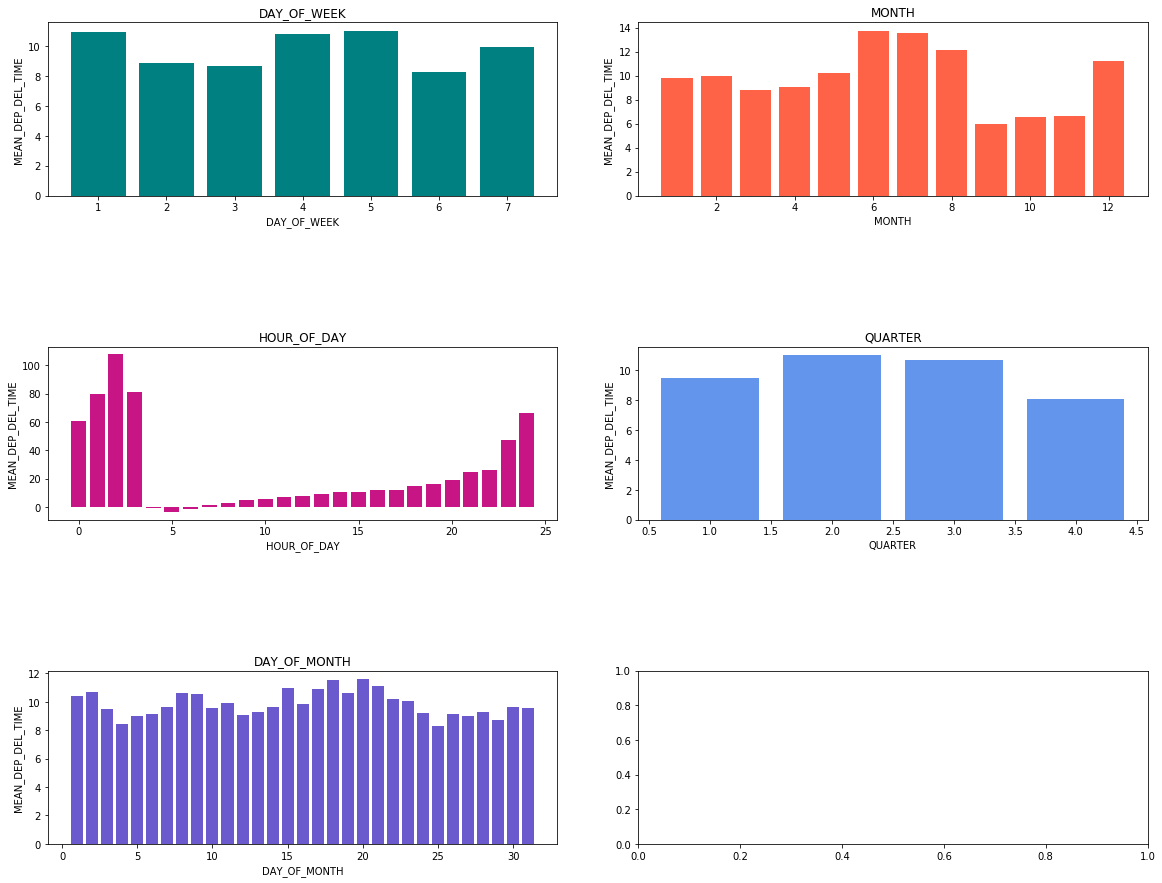

Text(0.5, 1, 'DAY_OF_MONTH')

In [0]:
# Display the temporal features and their relationships to departure delays
fig, ax = plt.subplots(3,2, figsize = (16, 12))
fig.tight_layout(h_pad=13, w_pad=5) 

ax[0][0].bar(data_day['DAY_OF_WEEK'] , data_day['MEAN_DEP_DEL_TIME'],  
            label='MEAN_DEP_DEL_TIME', color = 'Teal')
ax[0][0].set_xlabel('DAY_OF_WEEK')
ax[0][0].set_ylabel('MEAN_DEP_DEL_TIME')
ax[0][0].set_title('DAY_OF_WEEK')

ax[0][1].bar(data_month['MONTH'] , data_month['MEAN_DEP_DEL_TIME'],  
            label='MEAN_DEP_DEL_TIME', color = 'tomato' )
ax[0][1].set_xlabel('MONTH')
ax[0][1].set_ylabel('MEAN_DEP_DEL_TIME')
ax[0][1].set_title('MONTH')
 
ax[1][0].bar(data_hour['HOUR_OF_DAY'] , data_hour['MEAN_DEP_DEL_TIME'],  
            label='MEAN_DEP_DEL_TIME', color = 'mediumvioletred' )
ax[1][0].set_xlabel('HOUR_OF_DAY')
ax[1][0].set_ylabel('MEAN_DEP_DEL_TIME')
ax[1][0].set_title('HOUR_OF_DAY')

ax[1][1].bar(data_quarter['QUARTER'] , data_quarter['MEAN_DEP_DEL_TIME'],  
            label='MEAN_DEP_DEL_TIME', color = 'cornflowerblue' )
ax[1][1].set_xlabel('QUARTER')
ax[1][1].set_ylabel('MEAN_DEP_DEL_TIME')
ax[1][1].set_title('QUARTER')

ax[2][0].bar(data_day_month['DAY_OF_MONTH'] , data_day_month['MEAN_DEP_DEL_TIME'],  
            label='MEAN_DEP_DEL_TIME', color = 'slateblue')
ax[2][0].set_xlabel('DAY_OF_MONTH')
ax[2][0].set_ylabel('MEAN_DEP_DEL_TIME')
ax[2][0].set_title('DAY_OF_MONTH')

The EDA above suggests that there are relationships between the temporal features and departure delays.

#### 2.6 Exploring Airports and Airlines Impact on Flight Departure Delay

In [0]:
# Construct dataframes to examine airport and airline relationships to delays
dep_delay_mean=airlines.select( 'OP_UNIQUE_CARRIER','DEP_DELAY' ).groupBy('OP_UNIQUE_CARRIER').agg(f.avg('DEP_DELAY')).withColumnRenamed('avg(DEP_DELAY)', 'MEAN_DEP_DEL_TIME') 
arr_delay_mean = airlines.select( 'OP_UNIQUE_CARRIER','ARR_DELAY' ).groupBy('OP_UNIQUE_CARRIER').agg(f.avg('ARR_DELAY')).withColumnRenamed('avg(ARR_DELAY)', 'MEAN_ARR_DEL_TIME') 
air_delay = dep_delay_mean.join(arr_delay_mean, ['OP_UNIQUE_CARRIER'])   
df = air_delay.toPandas()
df2 = df.sort_values(by='MEAN_DEP_DEL_TIME', ascending=False)
df2['OP_UNIQUE_CARRIER'].replace({
    'UA':'United Airlines',
    'G4':'Allegiant Airlines',
    'YV':'Mesa Airlines',
    'OH':'PSA Airlines',
    '9E':'Endeavor Air',
    'US':'Peidmont Airlines',
    'AS':'Alaska Airlines',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)
data_airline = df2.head(10)

#Airports
dep_delay_mean=airlines.select( 'ORIGIN','DEP_DELAY' ).groupBy('ORIGIN').agg(f.avg('DEP_DELAY')).withColumnRenamed('avg(DEP_DELAY)', 'MEAN_DEP_DEL_TIME') 
arr_delay_mean=airlines.select( 'ORIGIN','ARR_DELAY' ).groupBy('ORIGIN').agg(f.avg('ARR_DELAY')).withColumnRenamed('avg(ARR_DELAY)', 'MEAN_ARR_DEL_TIME') 
airport_features = arr_delay_mean.join(dep_delay_mean,  ['ORIGIN']) 
#grouped bar
df = airport_features.toPandas()
df2 = df.sort_values(by='MEAN_DEP_DEL_TIME', ascending=False)
data_airport = df2.head(10)

Out[16]:

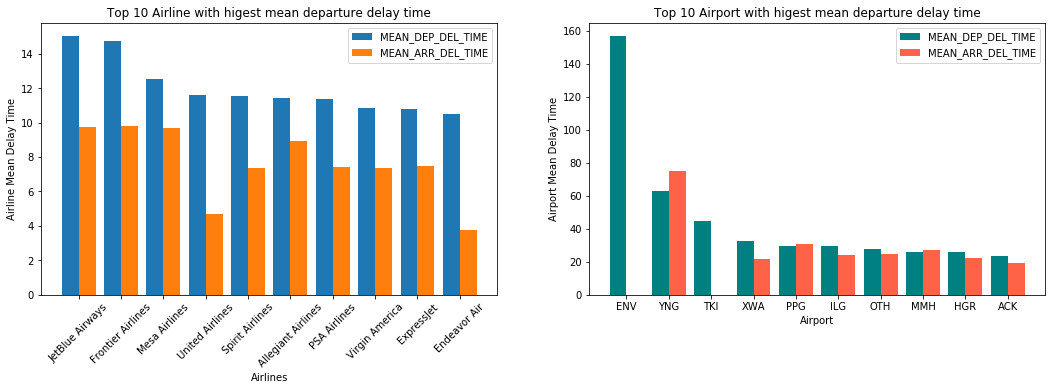

<matplotlib.legend.Legend at 0x7f1bd59bc090>

In [0]:
#Group bar charts for airlines and airports depicting arrival and departure delay
fig, ax = plt.subplots(1,2, figsize = (18, 5))
#Airlines
x = np.arange(len(data_airline['OP_UNIQUE_CARRIER'].unique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Add `width` parameter now which sets the width of each bar.
b1 = ax[0].bar(x, data_airline['MEAN_DEP_DEL_TIME'],
            width=bar_width, label='MEAN_DEP_DEL_TIME')
# Offset the x by the width of the bar.
b2 = ax[0].bar(x + bar_width, data_airline['MEAN_ARR_DEL_TIME'],  
            width=bar_width,label='MEAN_ARR_DEL_TIME')
 
ax[0].set_ylabel("Airline Mean Delay Time")
ax[0].set_xlabel("Airlines")
ax[0].set_title("Top 10 Airline with higest mean departure delay time")
ax[0].set_xticks(x + bar_width / 2)
ax[0].set_xticklabels(data_airline['OP_UNIQUE_CARRIER'].unique())
# Add legend.
ax[0].legend()
ax[0].set_xticklabels(data_airline['OP_UNIQUE_CARRIER'], rotation=45)

#Airports
x = np.arange(len(data_airport['ORIGIN'].unique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax[1].bar(x, data_airport['MEAN_DEP_DEL_TIME'],
            width=bar_width, label='MEAN_DEP_DEL_TIME', color='Teal')
# Same thing, but offset the x by the width of the bar.
b2 = ax[1].bar(x + bar_width, data_airport['MEAN_ARR_DEL_TIME'],  
            width=bar_width,label='MEAN_ARR_DEL_TIME', color='tomato')
 
ax[1].set_ylabel("Airport Mean Delay Time")
ax[1].set_xlabel("Airport")
ax[1].set_title("Top 10 Airport with higest mean departure delay time")
ax[1].set_xticks(x + bar_width / 2)
ax[1].set_xticklabels(data_airport['ORIGIN'].unique())
# Add legend.
ax[1].legend()

Clearly there are strong relationships between airline carriers and delays.  Though there is a relationship between the feature and the outcome an underlying assumption of the model would be that only flights from the carriers in the train set could be used to predict whether an flight will be delayed.  As such carrier variables were not chosen for the model.  This reasoning is also true of airport locations and for the same reason, airports themselves were not considered as a feature in the model.

#### 2.7 Weather Impacts on Flight Departure Delay

##### 1) On the joined five airports

On our joined dataset between the airlines and the weather tables with five airports, we observed clear correlation between Visibility and Departure Delay. As shown in the following two box plots, we can see that the lower the Hight Visibility(HVIS), the higher occurrences of the departure delay. Similarly, the lower the Distance Visibility(DVIS), the higher occurrences of the departure delay.

In this section we consider several key features for their potential for ability to impact the prediction of flight delay.  Initial exploration suggests a correlation between height visibility and delay, as well as temperature.  This exploration is performed here on a joined table of the Airline Flights Table and the Weather Table. Here the table is used to motivate the choices of features from the Weather Table.  The data transformation steps used to outline the process of joining the two tables are outline below.

Out[17]:

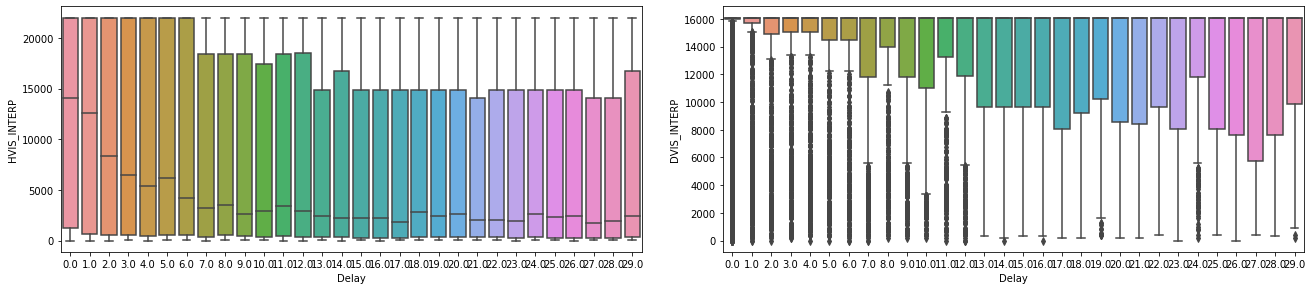

<matplotlib.axes._subplots.AxesSubplot at 0x7f1bd56f6290>

In [0]:
#DVIS and HVIS using five airports data
from pyspark.sql.types import FloatType

data = spark.read.parquet("/output/AirportComplete1.parquet")
def delay_min(stime,atime):
  sm = float(int(stime/100.0))*60+ float(stime/100.0 - float(int(stime/100.0)))*100
  am = float(int(atime/100.0))*60 + float(atime/100.0 - float(int(atime/100.0)))*100
  if (am-sm) < 0.0:
    return 0.0
  else:
    return am-sm

udf_delay_min = f.udf(delay_min,FloatType())
delay_weather = data.select(["CRS_DEP_TIME","DEP_TIME","TEMPERATURE_INTERP","DVIS_INTERP","HVIS_INTERP","WVEL_INTERP","WDIR_INTERP"]) \
                    .withColumn("Delay",udf_delay_min("CRS_DEP_TIME","DEP_TIME"))
df_weather  = delay_weather.select("*").where((f.col('Delay')<30)).toPandas()
import seaborn as sns
fig, ax = plt.subplots(1,2, figsize = (18, 4))
fig.tight_layout(h_pad=13, w_pad=5)
sns.boxplot(df_weather['Delay'], df_weather['HVIS_INTERP'], data=df_weather, ax=ax[0] )
 
sns.boxplot(df_weather['Delay'], df_weather['DVIS_INTERP'], data=df_weather, ax= ax[1] )
 

##### 2) On the full joined dataset

On the full joined dataset with airlines and weathers, we observe more complex pattern in terms of the relationship patterns between the Departure Delay and the weather metrics. Please note that since the dataset is huge, we randomly sampled 10% of the total dataset for charting purposes.

1.The correlation between all the weather metrics and the departure delay is non-linear. 
  * This indicates that when we select the model for prediction, logistic regression might not be the best fit because of this non-linearity.
2. Wind Speed and Temperature shows distinct patterns. 
  * The most delays happen in the range of temperature (-20, 25)
  * The most delays happen in the range of wind speed (0,20)

In [0]:
airline_weather = spark.read.parquet("/output/airline_with_weather_interpolated_all_data_train_Total.parquet")

In [0]:
# Randomly sample the joined table to view relationships between key weather features and departure delay
data=airline_weather.sample(False, 0.1, seed = None)
delay_weather = data.select(["DEP_DELAY", "TEMPERATURE_INTERP","DVIS_INTERP","HVIS_INTERP","WVEL_INTERP","WDIR_INTERP"])
df_weather  = delay_weather.select("*").toPandas()

Out[20]:

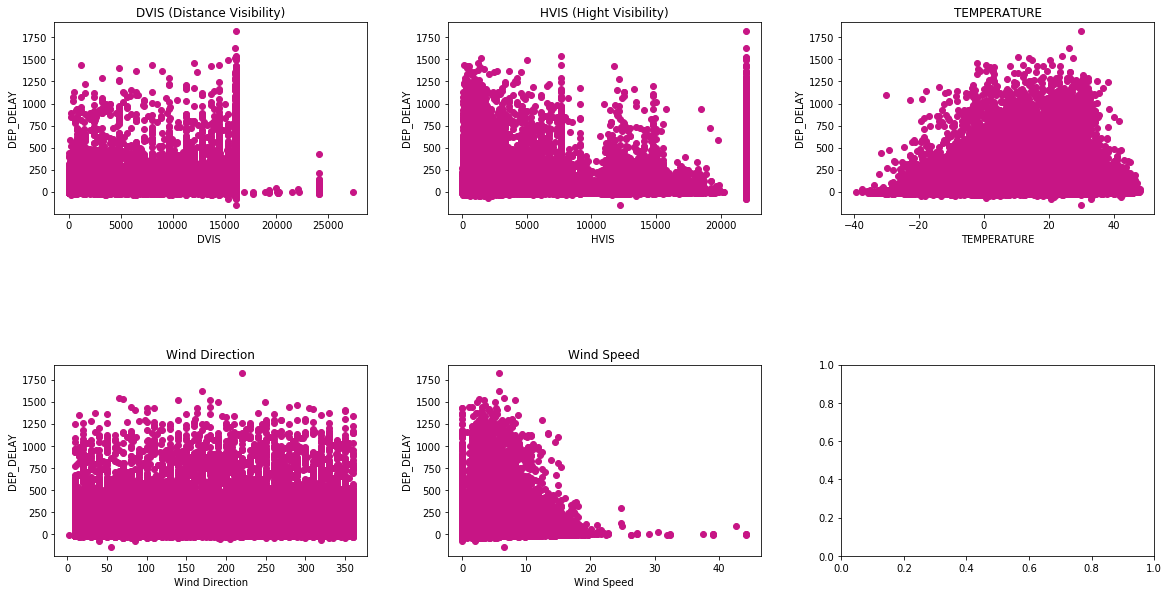

Text(0.5, 1, 'Wind Speed')

In [0]:
# Create plots of the key weather features and departure delay 
fig, ax = plt.subplots(2,3, figsize = (16, 8))
fig.tight_layout(h_pad=13, w_pad=5)  
ax[0][0].scatter(df_weather['DVIS_INTERP'] , df_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[0][0].set_xlabel('DVIS ')
ax[0][0].set_ylabel('DEP_DELAY')
ax[0][0].set_title('DVIS (Distance Visibility)')

ax[0][1].scatter(df_weather['HVIS_INTERP'] , df_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[0][1].set_xlabel('HVIS ')
ax[0][1].set_ylabel('DEP_DELAY')
ax[0][1].set_title('HVIS (Hight Visibility)')

ax[0][2].scatter(df_weather['TEMPERATURE_INTERP'] , df_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[0][2].set_xlabel('TEMPERATURE')
ax[0][2].set_ylabel('DEP_DELAY')
ax[0][2].set_title('TEMPERATURE')

ax[1][0].scatter(df_weather['WDIR_INTERP'] , df_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[1][0].set_xlabel('Wind Direction')
ax[1][0].set_ylabel('DEP_DELAY')
ax[1][0].set_title('Wind Direction')

ax[1][1].scatter(df_weather['WVEL_INTERP'] , df_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[1][1].set_xlabel('Wind Speed')
ax[1][1].set_ylabel('DEP_DELAY')
ax[1][1].set_title('Wind Speed')


The following correlation matrix shows more clear correlation scores between the weather features and the departure delay.

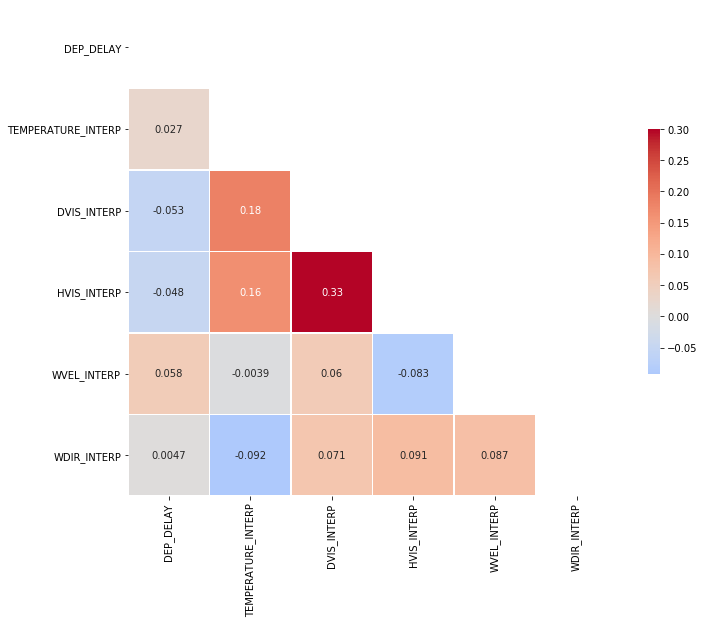

In [0]:
#Expolore the correlation between weather features and the departure delay
plt.figure(figsize=(16,8))
corr = df_weather.corr() 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap='coolwarm'
#cmap="warm"
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

Initial EDA on the Weather Table suggests that the most promising weather features are temperature, wind speed and height visibility.  The EDA suggests that a substantial number of delays occur around zero degrees celsius.  This makes sense in that often snowfall happens in this range.  Height visibility is inversely related to delays, and wind speed has relationship, namely most flight delays appear to happen at higher wind speeds.

In [0]:
########################

#### 2.8 Engineered features and correlation with Departure Delay

In this section, we explore the correlation between the engineered features and the departure delay. The following is the list of our engineered features:
* AirportAverageDelayMins - Average Delay in minutes for a given airport
* AirportPercentageDelay - Percentage of flights delay for a given airport
* CarrierAverageDelayMins - Average Delay in minutes for a given carrier
* CarrierPercentageDelay - Percentage of flights delay for a given carrier
* TOTAL_FLY_DAY - Total number of flights per day 
* LAYOVER_MIN - Minutes between two consecutive scheduled flights for the same plane that is identified by TAIL_NUM
* FLY_AIRPORT_DAY - Total number of flights per day for a given airport
* TOTAL_FLIGHTS - Total number of flights
* PIROR_ARR_DEL - Previous Arrival delay minutes of the same plane that is identified by TAIL_NUM
* DISTANCE - The flight distance. Note: this is not an engineered feature. Since it is not part of the three categories: temporal, airport/airlines, weather, we included in this section for EDA. This is the only exception in this section.
* FLT_CNT_RATIO - The ratio between the number of flights in the DEP_BLK and the hourly average flight numbers of a given airport

In [0]:
#Now we explore the engineered features' correlation with Departure Delay
#This includes: 'AirportAverageDelayMins','AirportPercentageDelay','CarrierAverageDelayMins','CarrierPercentageDelay',
# 'TOTAL_FLY_DAY','LAYOVER_MIN','FLY_AIRPORT_DAY','TOTAL_FLIGHTS','PRIOR_ARR_DEL','DISTANCE','FLT_CNT_RATIO'

features = spark.read.option("header", "true").parquet(f"/output/airline_12_5_2020_WithWeather_Interpolated1.parquet") 

#temporarily create FLT_CNT_RATIO for EDA
data2 = airlines.groupBy('ORIGIN','DEP_TIME_BLK').count().withColumnRenamed('count', 'FLT_CNT') 
data2.createOrReplaceTempView("flight_count")
data2=data2.groupBy('ORIGIN').agg((f.avg('FLT_CNT'))).withColumnRenamed('avg(FLT_CNT)','AVG_FLT_CNT')
data2.createOrReplaceTempView("avg_count")
data2 = spark.sql("SELECT A.ORIGIN, A.DEP_TIME_BLK, A.FLT_CNT/B.AVG_FLT_CNT as FLT_CNT_RATIO FROM flight_count A, avg_count B WHERE A.ORIGIN= B.ORIGIN")
features = features.join(data2, ['ORIGIN', 'DEP_TIME_BLK'], 'left')

#add distance
airlines = spark.read.option("header", "true").parquet(f"dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data/201*.parquet")
data3 = airlines.select( 'FL_DATE', 'DEP_TIME','TAIL_NUM','DISTANCE' )
features = features.join(data3, ['FL_DATE', 'DEP_TIME','TAIL_NUM'], 'inner')

#temporarily join prior_arr_del for EDA
prior_del = spark.read.parquet("/output/airline_12_5_2020_WithWeather_Interpolated_prior_arr.parquet")
data1 = prior_del.select( 'FL_DATE', 'DEP_TIME','TAIL_NUM','PRIOR_ARR_DEL15', 'PRIOR_ARR_DEL' )
features = features.join(data1, ['FL_DATE', 'DEP_TIME','TAIL_NUM'], 'inner')


In [0]:
display(features)

FL_DATE DEP_TIME TAIL_NUM ORIGIN DEP_TIME_BLK YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER_FL_NUM ORIGIN_CITY_MARKET_ID DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP CRS_ARR_TIME ARR_TIME ARR_TIME_BLK DATE_BIN ORI_AIRPORT_ID ORI_LAT ORI_LON TIMEZONE TOTAL_FLY_DAY LAYOVER_MIN FLY_AIRPORT_DAY AirportAverageDelayMins AirportPercentageDelay CarrierAverageDelayMins CarrierPercentageDelay TOTAL_FLIGHTS TEMPERATURE_INTERP DVIS_INTERP HVIS_INTERP WVEL_INTERP WDIR_INTERP TIMEZONE_ARRIVAL EPOCH_DEPT EPOCH_ARRIVAL PRIOR_DEP_TIME PRIOR_DEP_DEL15 PRIOR_DEP_DEL FLT_CNT_RATIO DISTANCE PRIOR_ARR_DEL15 PRIOR_ARR_DEL 2015-01-01 659 N5BTAA SAN 0700-0759 2015 1 1 1 4 AA 19805 70 33570 11298 1129803 30194 DFW Dallas/Fort Worth, TX TX 48 Texas 74 705 -6.0 0.0 0.0 -1 1205 1150 1200-1259 01/01/2015, 05:00:00 14679 32.73361111 -117.1897222 America/Los_Angeles 4 -160.0 191 10.83025108718285 0.17108919327083477 12.634527719783968 0.1778604659323854 39883 5.0 16093.0 22000.0 2.6 140.0 America/Chicago 1.42012467E9 1.42013555E9 null 0.0 0.0 1.3360878285054774 1171.0 0.0 0.0 2015-01-01 748 N13538 TUL 0700-0759 2015 1 1 1 4 EV 20366 5787 34653 12266 1226603 31453 IAH Houston, TX TX 48 Texas 74 755 -7.0 0.0 0.0 -1 935 926 0900-0959 01/01/2015, 05:45:00 15370 36.19833333 -95.88805556 America/Chicago 6 30.0 31 10.61484108221697 0.14160756501182034 14.89137963351129 0.18071011843979473 10263 -3.3 16093.0 1006.0 0.0 257.58243 America/Chicago 1.42012045E9 1.42012646E9 null 0.0 0.0 1.0216588727541225 429.0 0.0 0.0 2015-01-01 800 N703UW ALB 0800-0859 2015 1 1 1 4 US 20355 858 30257 11057 1105703 31057 CLT Charlotte, NC NC 37 North Carolina 36 800 0.0 0.0 0.0 0 1026 1018 1000-1059 01/01/2015, 06:00:00 10257 42.74916667 -73.80194444 America/New_York 4 40.0 15 11.719504060893788 0.1513516694785577 9.123201882372282 0.149300275368871 6907 -6.3999996 16093.0 12067.0 3.6 155.0 America/New_York 1.42011725E9 1.42012595E9 null 0.0 0.0 0.7207217627667573 646.0 0.0 0.0 2015-01-01 806 N797AS SLC 0700-0759 2015 1 1 1 4 AS 19930 743 34614 14771 1477101 32457 SFO San Francisco, CA CA 6 California 91 750 16.0 16.0 1.0 1 855 859 0800-0859 01/01/2015, 05:45:00 14869 40.78833333 -111.9777778 America/Denver 5 -7.0 225 9.122067698007264 0.1305100505057814 7.76191366892602 0.12852666390273532 30837 -12.8 16093.0 22000.0 1.5 150.0 America/Los_Angeles 1.42012378E9 1.42013133E9 null 0.0 0.0 0.645890702267845 599.0 0.0 0.0 2015-01-01 812 N924SW PSP 0600-0659 2015 1 1 1 4 OO 20304 6420 34262 11292 1129202 30325 DEN Denver, CO CO 8 Colorado 82 601 131.0 131.0 1.0 8 912 1136 0900-0959 01/01/2015, 04:00:00 14262 33.82972222 -116.5066667 America/Los_Angeles 4 -31.0 39 14.231927122023693 0.16600852328263674 13.99577156308873 0.16414336447754038 10248 1.2819673 16093.0 22000.0 1.1311475 340.0 America/Denver 1.42012083E9 1.42012864E9 null 0.0 0.0 3.658079715742314 776.0 0.0 0.0 2015-01-01 833 N837AS CAE 0800-0859 2015 1 1 1 4 EV 20366 5555 30868 10397 1039705 30397 ATL Atlanta, GA GA 13 Georgia 34 838 -5.0 0.0 0.0 -1 948 942 0900-0959 01/01/2015, 06:30:00 10868 33.93888889 -81.11944444 America/New_York 4 26.0 12 12.559469930120569 0.14873818747963358 14.89137963351129 0.18071011843979473 5352 -1.05 4828.0 22000.0 0.0 null America/New_York 1.42011942E9 1.42012365E9 null 0.0 0.0 1.1664711528207317 192.0 0.0 0.0 2015-01-01 913 N7726A PHX 0900-0959 2015 1 1 1 4 WN 19393 727 30466 11292 1129202 30325 DEN Denver, CO CO 8 Colorado 82 915 -2.0 0.0 0.0 -1 1100 1050 1100-1159 01/01/2015, 07:15:00 14107 33.43416667 -112.0116667 America/Phoenix 4 -79.0 420 10.85985778483463 0.17891814542015222 11.857732412312314 0.21094480283961498 87715 2.5 16093.0 1676.0 2.1 95.0 America/Denver 1.4201289E9 1.42013517E9 null 0.0 0.0 1.199596431089393 602.0 0.0 0.0 2015-01-01 943 N534MQ BNA 0900-0959 2015 1 1 1 4 MQ 20398 3086 30693 1

In [0]:
#Sample the dataset for charting
data=features
sampled = features.sample(False, 0.1, seed = None)
data_features = sampled.select('AirportAverageDelayMins', 'AirportPercentageDelay','CarrierAverageDelayMins','CarrierPercentageDelay',
 'TOTAL_FLY_DAY','LAYOVER_MIN','FLY_AIRPORT_DAY','TOTAL_FLIGHTS', 'PRIOR_ARR_DEL','PRIOR_DEP_DEL','DISTANCE','FLT_CNT_RATIO', 'DEP_DELAY')
df = data_features.toPandas()

Out[26]:

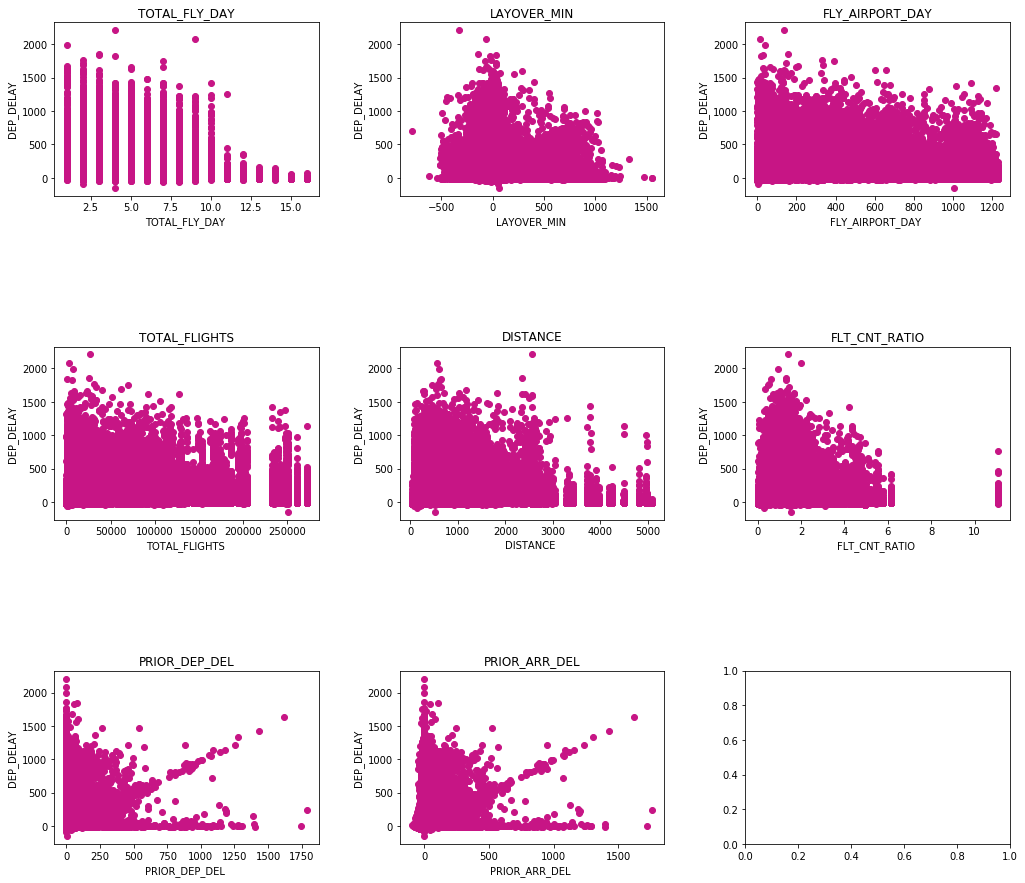

Text(0.5, 1, 'PRIOR_ARR_DEL')

In [0]:
fig, ax = plt.subplots(3,3, figsize = (14, 12))
fig.tight_layout(h_pad=13, w_pad=5)  

ax[0][0].scatter(df['TOTAL_FLY_DAY'] , df['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[0][0].set_xlabel('TOTAL_FLY_DAY ')
ax[0][0].set_ylabel('DEP_DELAY')
ax[0][0].set_title('TOTAL_FLY_DAY')

ax[0][1].scatter(df['LAYOVER_MIN'] , df['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[0][1].set_xlabel('LAYOVER_MIN ')
ax[0][1].set_ylabel('DEP_DELAY')
ax[0][1].set_title('LAYOVER_MIN')

ax[0][2].scatter(df['FLY_AIRPORT_DAY'] , df['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[0][2].set_xlabel('FLY_AIRPORT_DAY ')
ax[0][2].set_ylabel('DEP_DELAY')
ax[0][2].set_title('FLY_AIRPORT_DAY')

ax[1][0].scatter(df['TOTAL_FLIGHTS'] , df['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[1][0].set_xlabel('TOTAL_FLIGHTS ')
ax[1][0].set_ylabel('DEP_DELAY')
ax[1][0].set_title('TOTAL_FLIGHTS')
 
ax[1][1].scatter(df['DISTANCE'] , df['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[1][1].set_xlabel('DISTANCE ')
ax[1][1].set_ylabel('DEP_DELAY')
ax[1][1].set_title('DISTANCE')

ax[1][2].scatter(df['FLT_CNT_RATIO'] , df['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[1][2].set_xlabel('FLT_CNT_RATIO ')
ax[1][2].set_ylabel('DEP_DELAY')
ax[1][2].set_title('FLT_CNT_RATIO')

ax[2][0].scatter(df['PRIOR_DEP_DEL'] , df['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[2][0].set_xlabel('PRIOR_DEP_DEL ')
ax[2][0].set_ylabel('DEP_DELAY')
ax[2][0].set_title('PRIOR_DEP_DEL')

ax[2][1].scatter(df['PRIOR_ARR_DEL'] , df['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[2][1].set_xlabel('PRIOR_ARR_DEL ')
ax[2][1].set_ylabel('DEP_DELAY')
ax[2][1].set_title('PRIOR_ARR_DEL')
  

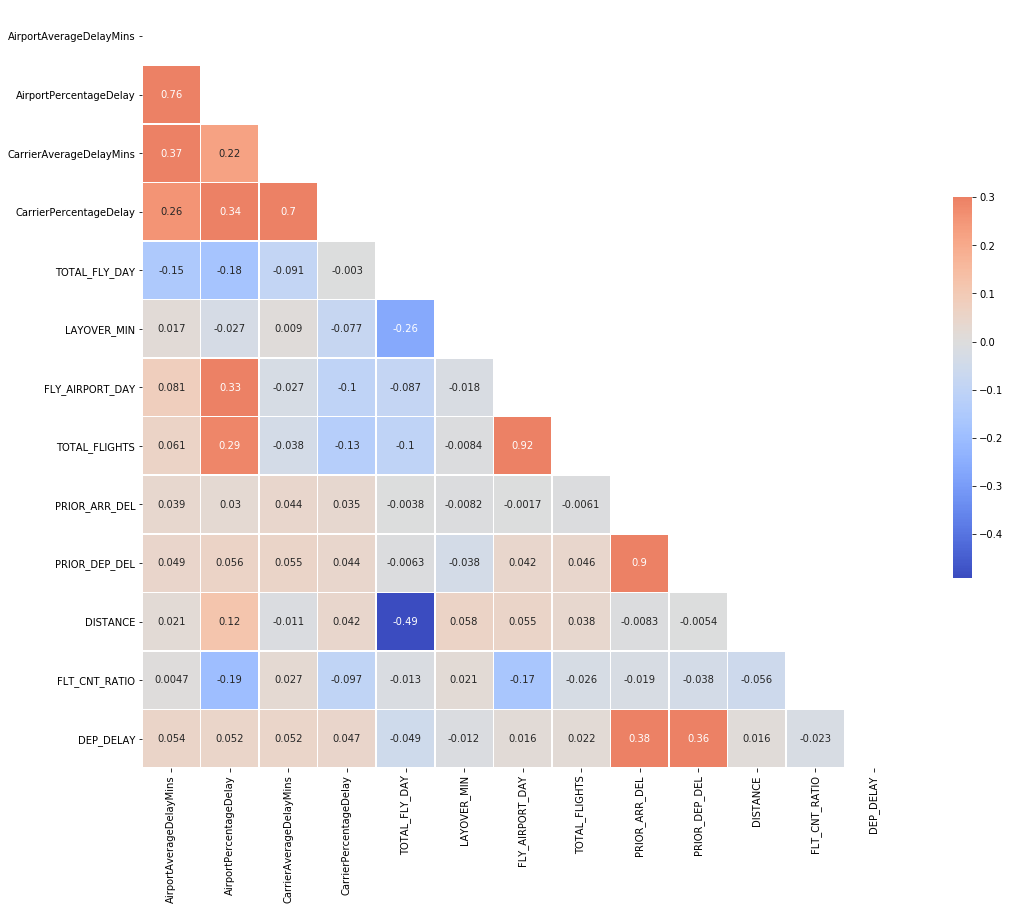

In [0]:
#correlation matrix for all the engineered feaures
plt.figure(figsize=(50,50))
corr = df.corr() 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 14))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)
cmap='coolwarm'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

As we can see, PRIOR_ARR_DEL and PRIOR_DEP_DEL have the highest correlation scores. These two features should be the strongest indicators for departure delay, which we should definitely include in the modeling phase.

### Link to Pipeline Notebook

The following link connects to the Data Engineering and Model Development notebook.

Link: https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/667068395493739/command/2834511320032771